<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.626727,32.684308,56.070536,79.862621,0.009724,262.253916,262.244428,0.009488
1,0.0,1.0,89.436797,89.248153,74.492078,84.075655,-0.005810,347.246874,347.248649,-0.001776
2,0.0,2.0,98.655918,36.338132,68.548829,99.688499,-0.004236,313.227143,313.228982,-0.001839
3,0.0,3.0,77.062221,25.005316,96.872157,98.424191,0.012106,307.375991,307.362393,0.013598
4,0.0,4.0,52.793196,88.032053,23.893861,59.904663,0.001293,234.625068,234.625046,0.000022
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.873883,34.938346,96.204448,22.047539,-0.012026,260.052191,260.063674,-0.011483
249996,999.0,246.0,97.269265,40.375681,93.920207,29.735666,0.034292,271.335110,271.300632,0.034478
249997,999.0,247.0,48.369211,57.860063,82.654207,61.143208,0.000634,260.027323,260.027338,-0.000015
249998,999.0,248.0,29.209461,37.259984,87.224997,84.941840,0.003544,248.639825,248.637590,0.002234


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.626727,32.684308,56.070536,79.862621,0.009724,262.253916,262.244428,0.009488
1,0.0,1.0,89.436797,89.248153,74.492078,84.075655,-0.005810,347.246874,347.248649,-0.001776
2,0.0,2.0,98.655918,36.338132,68.548829,99.688499,-0.004236,313.227143,313.228982,-0.001839
3,0.0,3.0,77.062221,25.005316,96.872157,98.424191,0.012106,307.375991,307.362393,0.013598
4,0.0,4.0,52.793196,88.032053,23.893861,59.904663,0.001293,234.625068,234.625046,0.000022
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.873883,34.938346,96.204448,22.047539,-0.012026,260.052191,260.063674,-0.011483
249996,999.0,246.0,97.269265,40.375681,93.920207,29.735666,0.034292,271.335110,271.300632,0.034478
249997,999.0,247.0,48.369211,57.860063,82.654207,61.143208,0.000634,260.027323,260.027338,-0.000015
249998,999.0,248.0,29.209461,37.259984,87.224997,84.941840,0.003544,248.639825,248.637590,0.002234


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.626727,32.684308,56.070536,79.862621,0.009724,262.253916,262.244428,0.009488
1,0.0,1.0,89.436797,89.248153,74.492078,84.075655,-0.005810,347.246874,347.248649,-0.001776
2,0.0,2.0,98.655918,36.338132,68.548829,99.688499,-0.004236,313.227143,313.228982,-0.001839
3,0.0,3.0,77.062221,25.005316,96.872157,98.424191,0.012106,307.375991,307.362393,0.013598
4,0.0,4.0,52.793196,88.032053,23.893861,59.904663,0.001293,234.625068,234.625046,0.000022
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.873883,34.938346,96.204448,22.047539,-0.012026,260.052191,260.063674,-0.011483
249996,999.0,246.0,97.269265,40.375681,93.920207,29.735666,0.034292,271.335110,271.300632,0.034478
249997,999.0,247.0,48.369211,57.860063,82.654207,61.143208,0.000634,260.027323,260.027338,-0.000015
249998,999.0,248.0,29.209461,37.259984,87.224997,84.941840,0.003544,248.639825,248.637590,0.002234


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

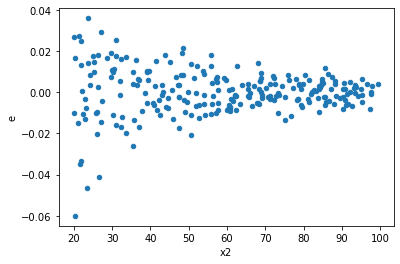

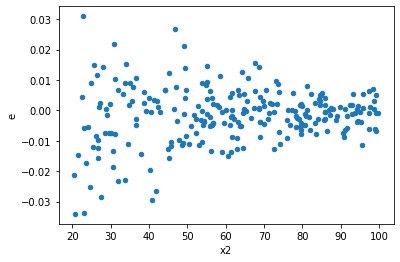

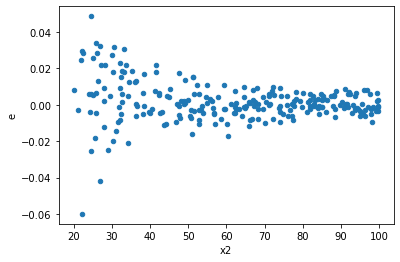

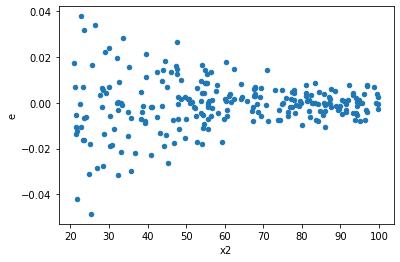

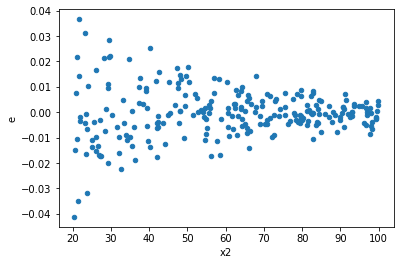

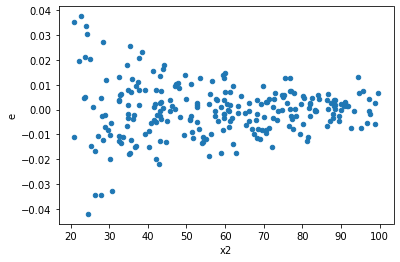

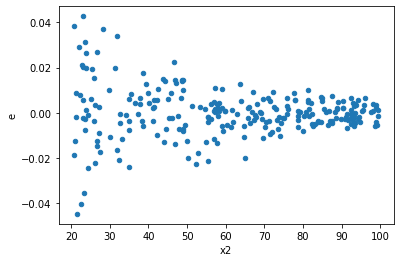

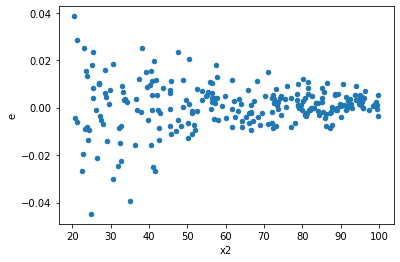

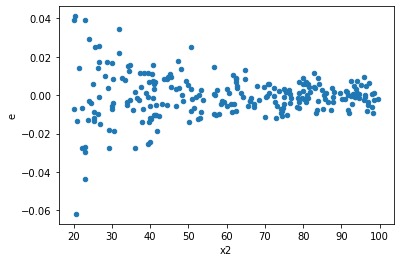

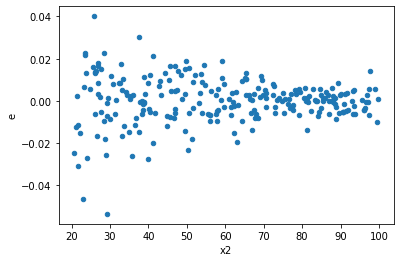

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
358.0,96.0,96.0,0.013421753955937385,0.016749165332664823,0.00013980993704101443,0.00017447047221525857,1.2479118144805128,0.2796690023903359,0.8601654988048321,0.13983450119516794,Reject005=1 : Homoscedasticity
693.0,96.0,96.0,0.009543583838242591,0.010135693442473392,9.941233164836032e-05,0.0001055801400257645,1.0620426890219299,0.7686809677762481,0.615659516111876,0.38434048388812403,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.016149074070130182,0.005794184098830275,0.00016821952156385607,6.035608436281536e-05,0.3587935799704686,9.337035648549784e-07,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,0.010414736044022418,0.005134059501873761,0.00010848683379190019,5.3479786477851676e-05,0.49296107747449597,0.0006234396441487689,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,0.013101814647074505,0.0038408502303772523,0.0001364772359070261,4.000885656642971e-05,0.29315406558853074,5.797015790555626e-09,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,0.020135744270967256,0.005938606996322237,0.00020974733615590892,6.18604895450233e-05,0.2949286063830689,6.8143002970727414e-09,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,0.01589703741170907,0.005718424801919156,0.0001655941397053028,5.9566925019991206e-05,0.35971638323674143,9.91512692620156e-07,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,0.019341621486996818,0.004470868366618867,0.00020147522382288352,4.6571545485613194e-05,0.23115271745052954,6.361387798104118e-12,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,0.017621257633064113,0.010411035161838632,0.0001835547670110845,0.00010844828293581908,0.5908224814955098,0.010565128261050195,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,0.019823019070414633,0.005509084009694849,0.00020648978198348577,5.7386291767654676e-05,0.2779134696952908,1.3520573923684155e-09,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,0.018477101040828683,0.005915896964761017,0.00019246980250863213,6.162392671626059e-05,0.32017452043416944,5.797141005411065e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    959
Reject005=1 : Homoscedasticity       41
Name: Result_test, dtype: int64